<a href="https://colab.research.google.com/github/airon14/CpE-AIML/blob/main/58034_Lab06_Millicheckers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratory Activity

**Purpose of the dataset:**

The purpose of studying this dataset is to study the different data which comes 
from the data set and predict whether the pregnant woman has diabetes 
using different several factors such as blood pressure, glucose, 
insulin, bmi and other factors. The data collected is then tested and plotted to show the positive and negative areas of each factors in whether diabetes exist in the woman. 

**Needs statement:**

This data set gives data on the problems using the factors which affects diabetes such as glucose and bmi. 
By using different visual figures such as plotting and heatmap, the researchers are given data on
how each factors affect diabetes by using logistic regression with the goal of collecting data which could 
be used to create solutions or just to know how each factor increases the risk of diabetes. 

**Significance of the dataset:**

The signifance of this dataset is for the researchers to study the pregnant woman's probability of obtaining diabetes
according to different factors of data such as glucose, number of pregnancy, blood pressure, insulin, bmi and others. By obtaining positive results, the researchers could use this data to predict diabetes from patients and make appropriate actions before the pregnant woman becomes diabetic. 

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_diabetes = pd.read_csv('/content/diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [9]:
df_diabetes.describe

<bound method NDFrame.describe of       Pregnancies  Glucose  BloodPressure  ...  Age  Outcome  class
0               2      138             62  ...   47        1      1
1               0       84             82  ...   23        0      0
2               0      145              0  ...   31        1      1
3               0      135             68  ...   24        1      1
4               1      139             62  ...   21        0      0
...           ...      ...            ...  ...  ...      ...    ...
1995            2       75             64  ...   33        0      0
1996            8      179             72  ...   36        1      1
1997            6       85             78  ...   42        0      0
1998            0      129            110  ...   26        1      1
1999            2       81             72  ...   25        0      0

[2000 rows x 10 columns]>

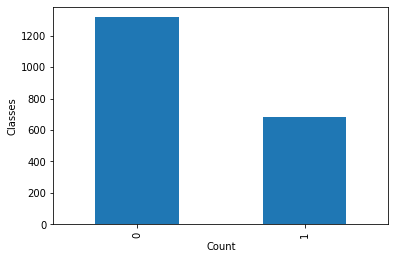

In [2]:
df_diabetes["class"] = df_diabetes.Outcome
df_diabetes['class'].value_counts().plot(kind = "bar")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [3]:
X = df_diabetes.drop("class", axis = 1)
Y = df_diabetes["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)

In [4]:
class Perceptron:

  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []

    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        self.w = chkptw
        self.b = chkptb

        ##print(max_accuracy)
        ##plt.plot(np.array(accuracy.values())).astype(float)
        ##plt.xlabel("Epoch #")
        ##plt.ylabel("Accuracy")
        ##plt.ylim([0, 1])
        ##plt.show()
  
    return np.array(wt_matrix)

In [8]:
perceptron = Perceptron()

wt_matrix = perceptron.fit(X_train, Y_train, 5000, 0.3)

In [6]:
Y_pred_test = perceptron.predict(X_test)

print(accuracy_score(Y_pred_test, Y_test))

1.0
